# Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

In this Notebook we will analyse a dataset containing information about customers of a telephone company<br>
The data can be found <a href='https://www.kaggle.com/blastchar/telco-customer-churn'>here</a> on kaggle public datasets.<br>
The goal is to predict if a customer will churn based on his informations. 
Knowing if a customer is at risk of leaving is one of the most important tasks a company would like to perform

# Content

This dataset contains information about:<br>
<ul>
    <li>Customers who left within the last month – the column is called Churn
    <li>Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    <li>Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    <li>Demographic info about customers – gender, age range, and if they have partners and dependents    
</ul>


# Summary 

<ol>
    <li>Exploratory data analysis
    <li>Metrics and model selection
    <li>Data preprocessing
    <li>Training and evaluation
    <li>Conclusion
</ol>

In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [591]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
#We load the dataset

In [592]:
data.shape
#There are 7043 customers and 20 features. The target variable we want to be able to predict is 'Churn' which is equal to 'Yes'
#if the customer churned, and 'No' otherwise

(7043, 21)

In [593]:
data.head().T
#An overview of our data

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [594]:
data.dtypes
#There are 3 numeric variables : tenure, MonthlyCharges and TotalCharges
#18 categorical variables (SeniorCitizen is equal to 1 if the customer is considered 'Senior' and 0 otherwise)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [595]:
np.unique(data.TotalCharges.values)
#There are missing values in TotalCharges columns, that are equal to ' '

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

In [596]:
data=data.replace(to_replace=" ",value=np.nan) #this will allow us to convert the feature to numeric

In [597]:
data.TotalCharges=pd.to_numeric(data.TotalCharges) 

In [598]:
data.dtypes #now dtypes are correct

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [599]:
np.unique(data.TotalCharges.values)

array([18.8 , 18.85, 18.9 , ...,   nan,   nan,   nan])

In [600]:
#now we look at basic statistics, this table show that there are 11 missing values in "TotalCharges", on average people stay
#1 month but the dispersion of values is high with a standard deviation of 24
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [601]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [602]:
numeric_features = data.select_dtypes(include=[np.number])

In [603]:
numeric_features.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [604]:
categorical_features = data.select_dtypes(include=[np.object])

In [605]:
categorical_features.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [606]:
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [607]:
data.kurt()

SeniorCitizen     1.362596
tenure           -1.387372
MonthlyCharges   -1.257260
TotalCharges     -0.231799
dtype: float64

In [608]:
data.groupby('gender').size()#this feature is balanced

gender
Female    3488
Male      3555
dtype: int64

In [609]:
data.groupby('Churn').size()/len(data)

Churn
No     0.73463
Yes    0.26537
dtype: float64

In [610]:
#Let's make visual charts
#Univariate analysis

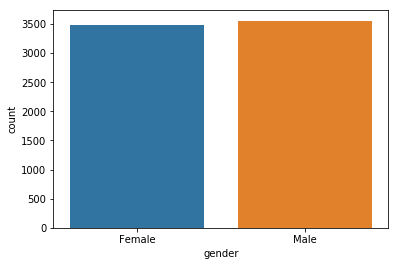

In [611]:
sns.countplot(x='gender',data=data)
#balanced feature 

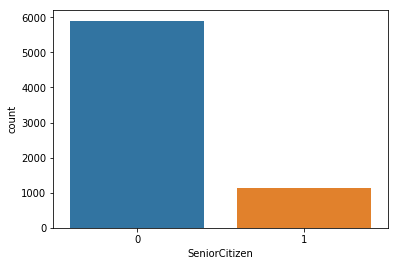

In [612]:
sns.countplot(x='SeniorCitizen',data=data)
#6 times less seniors

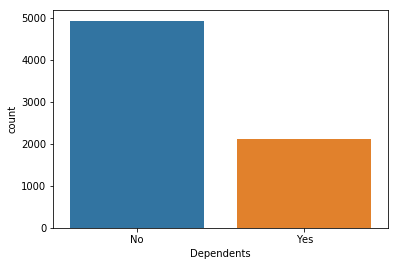

In [613]:
sns.countplot(x='Dependents',data=data)
#two times more people with dependents

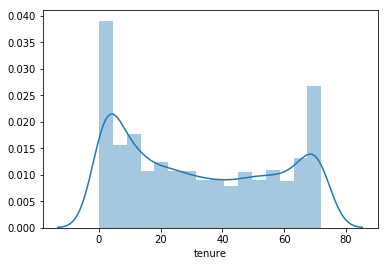

In [614]:
sns.distplot(data.tenure)
#distribution with kernel density estimation, 20 bins by default
#This is not a normal distribution
#The plot shows that there are many people who stay for a short time, and many people who stay for more than 60 months (5 years)
#this kind of distribution was expected

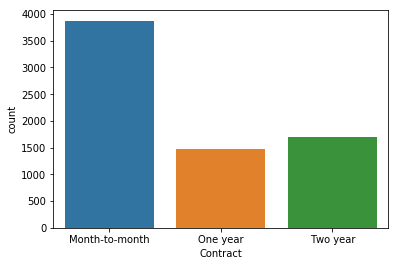

In [615]:
sns.countplot(x='Contract',data=data)
#most customers have a Month-to-month contract

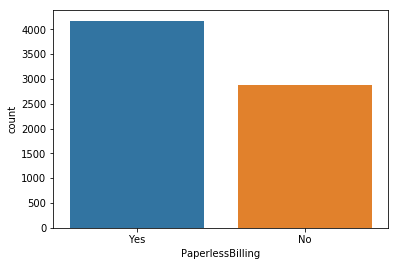

In [616]:
sns.countplot(x='PaperlessBilling',data=data)
#a lot of customer have a paperless billing

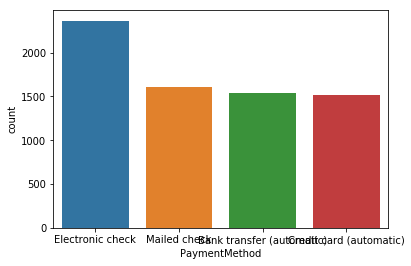

In [617]:
sns.countplot(x='PaymentMethod',data=data)
#electronic check, mailed check, bank transfer, credit card

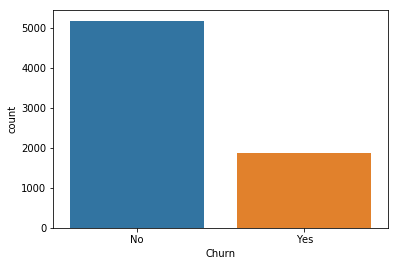

In [618]:
sns.countplot(x='Churn',data=data)

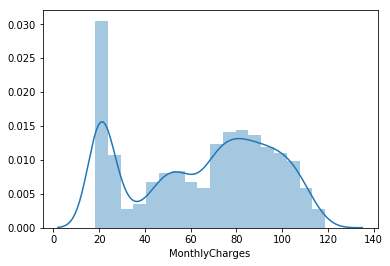

In [619]:
sns.distplot(data.MonthlyCharges)
#a lot of people have minimum monthly charges because they choose the cheapest offer

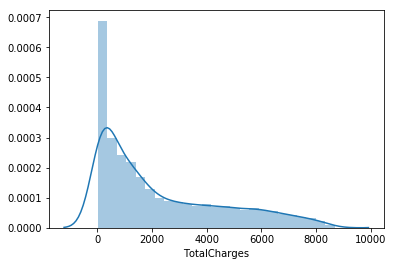

In [620]:
sns.distplot(data.dropna().TotalCharges)

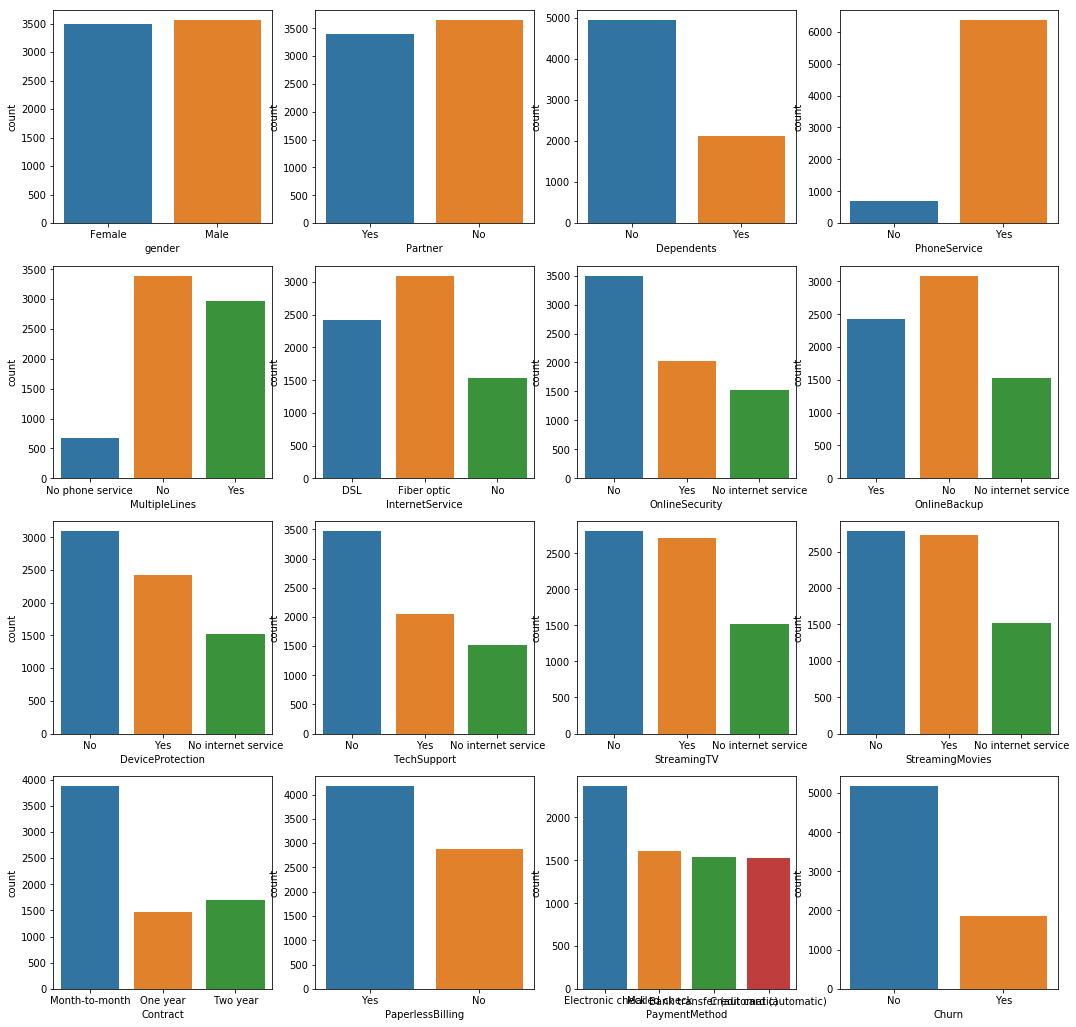

In [621]:
plt.figure(figsize=(18,18))
for k in range(1,len(categorical_features.columns)):
    plt.subplot(4,4,k)
    sns.countplot(x=categorical_features.columns[k],data=data)
    
#synthesis of the charts of all the features

Bivariate analysis<br>
Let's visualize categorical features based on Churn

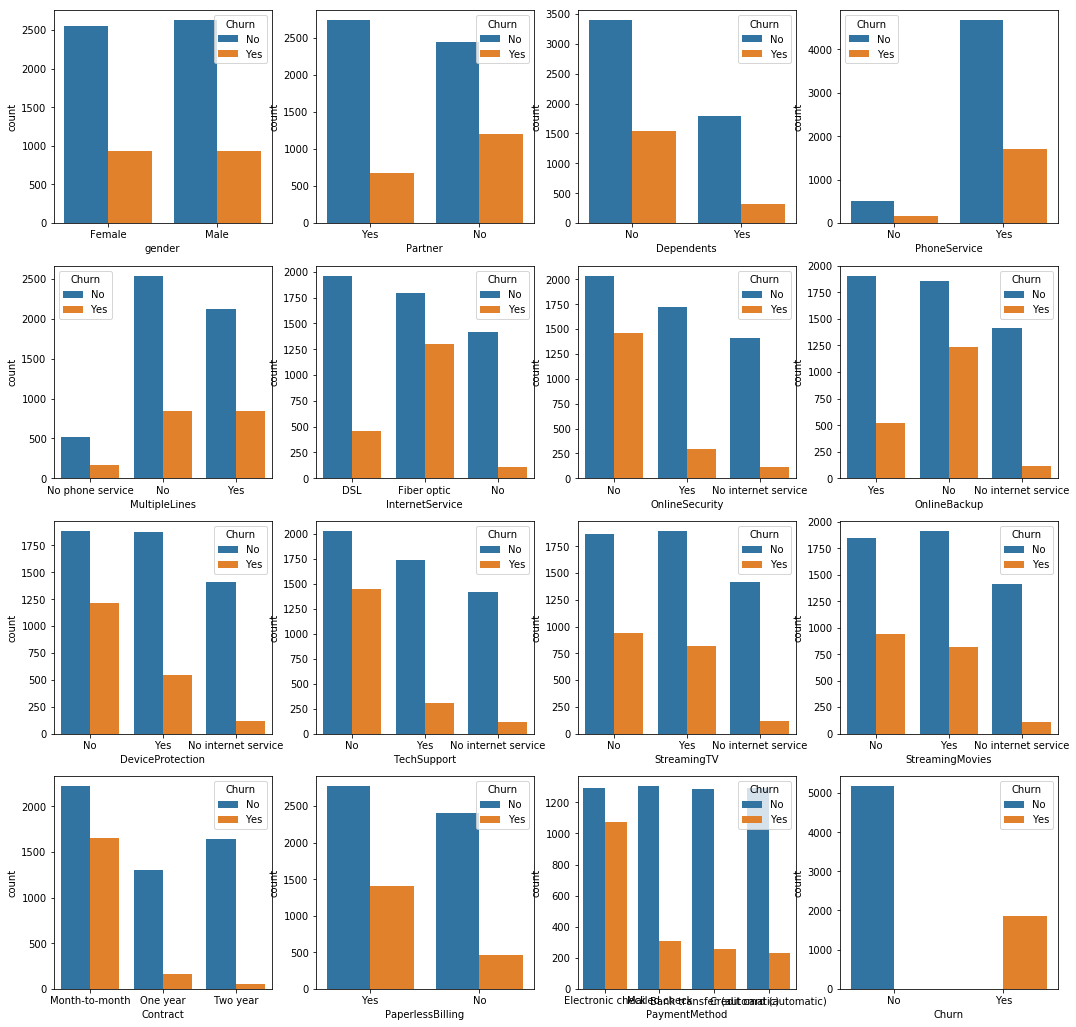

In [622]:
plt.figure(figsize=(18,18))
for k in range(1,len(categorical_features.columns)):
    plt.subplot(4,4,k)
    sns.countplot(x=categorical_features.columns[k],data=data,hue='Churn')

In [623]:
#among those who have optical fiber, there are many who churn, those who have no technical support, no device protection
#those who have a month-to-month contract are more likely to churn 
#these are important features for the classification

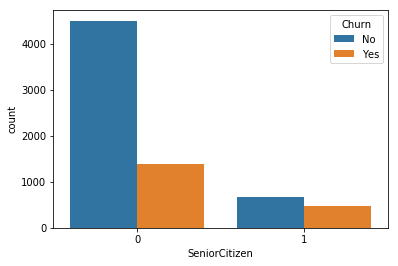

In [624]:
sns.countplot(x='SeniorCitizen',data=data,hue='Churn')

In [625]:
#now we analyse numeric features regarding the Churn

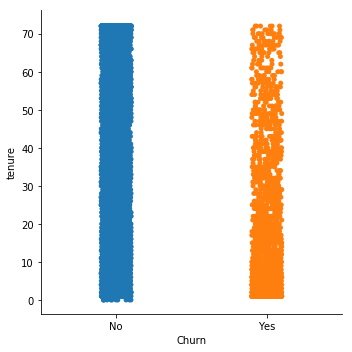

In [626]:
sns.catplot(x='Churn',y='tenure',data=data)
#among those who have churned, there is a large part that has remained for a short time, which is logical, 
#while for those who stayed, the distribution is fairly homogeneous

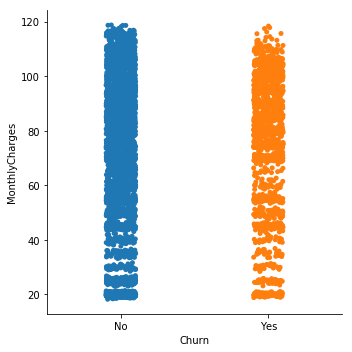

In [627]:
sns.catplot(x='Churn',y='MonthlyCharges',data=data)
#among those who have churned, many had high charges > 65

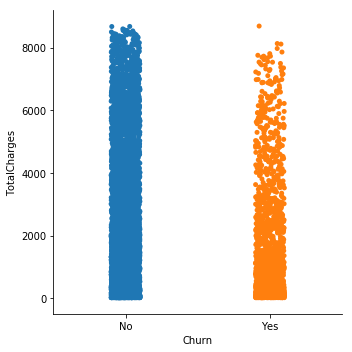

In [628]:
sns.catplot(x='Churn',y='TotalCharges',data=data)
#The overall charge for those who have churned is low in general, because they tend to stay for a short time

Distribution of observations within categories

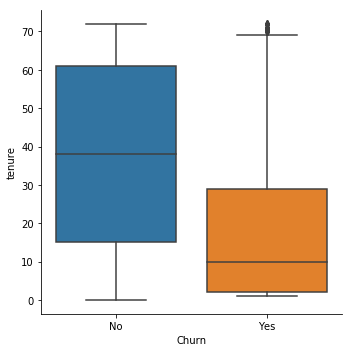

In [629]:
sns.catplot(x='Churn',y='tenure',kind='box',data=data)
#On average, those who have churned stayed less than a year (10 months) while those who stayed have been there for 3 years
#75% of those who have churned stayed less than 30 months
#a quarter of loyal customers have been here for more than 5 years

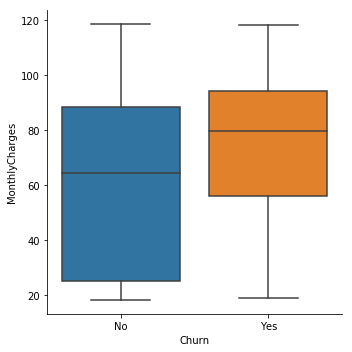

In [630]:
sns.catplot(x='Churn',y='MonthlyCharges',kind='box',data=data)
#On average, loyal customers have less monthly charges

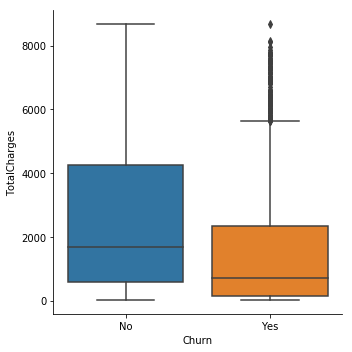

In [631]:
sns.catplot(x='Churn',y='TotalCharges',kind='box',data=data)

# Model quality metrics

Binary classification problem with imbalanced classes. So, instead of using accuracy, we'll use AUC score, because it's easy to achieve a good accuracy by predicting only 'No'

AUC score is the Area Under ROC curve, a score close to 1 means that we have a good model. The curve is drawn by computing true positive rate against false positive rate for various tresholds <br>
<img src="AUC.png">

# Model selection

It's a binary classification problem, we can try different models for this task :<br>
<ul>
    <li>Logistic regression
    <li>Decision tree classifier
    <li>Support vector machines
    <li>Random Forests
</ul>

# Data preprocessing

In [632]:
#let's transform the data so that we can feed it to a machine learning algorithm

In [633]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV #we will do hyperparameters tuning
from mlxtend.feature_selection import SequentialFeatureSelector #we will use this library to do feature selection, why ? to :
#reduce overfitting, decrease training time, decrease redundancy etc..

In [634]:
missing_index=np.array(data.isnull()).nonzero()[0]

In [635]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [636]:
#target
y=data.Churn
X=data.drop(columns=['Churn','customerID'])
y=y.drop(index=missing_index)

In [637]:
#label encoding for gender feature
X['gender']=X['gender'].map({'Male':1, 'Female':0})

In [638]:
#label encoding for other binary features
binary_variables=['Partner','Dependents','PhoneService','PaperlessBilling']

In [639]:
X[binary_variables]=X[binary_variables].replace({'Yes':1, 'No':0})

In [640]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65


In [641]:
#we scale numeric features because they have different magnitudes which can impact the performance of our model
X['tenure']=(X['tenure']-X['tenure'].mean())/X['tenure'].std()
X['MonthlyCharges']=(X['MonthlyCharges']-X['MonthlyCharges'].mean())/X['MonthlyCharges'].std()
X['TotalCharges']=(X['TotalCharges']-X['TotalCharges'].mean())/X['TotalCharges'].std()

In [642]:
#categorical features with more than 2 options
other_variables=['MultipleLines','InternetService','OnlineSecurity',
                 'OnlineBackup','DeviceProtection','TechSupport',
                 'StreamingTV','StreamingMovies','Contract','PaymentMethod']

In [643]:
onehot_encoded=pd.get_dummies(X[other_variables])

In [644]:
onehot_encoded.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [645]:
#features to scale to address the problem of features that are on different magnitudes
numeric=['tenure','MonthlyCharges','TotalCharges']

In [646]:
X=X.drop(columns=other_variables)

In [647]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277354,0,1,-1.160241,-0.994123
1,1,0,0,0,0.066323,1,0,-0.259611,-0.173727
2,1,0,0,0,-1.236636,1,1,-0.362635,-0.959581
3,1,0,0,0,0.514215,0,0,-0.746482,-0.195234
4,0,0,0,0,-1.236636,1,1,0.197351,-0.940391


In [648]:
X=pd.concat([X,onehot_encoded],axis=1)

In [649]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277354,0,1,-1.160241,-0.994123,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.066323,1,0,-0.259611,-0.173727,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.236636,1,1,-0.362635,-0.959581,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.514215,0,0,-0.746482,-0.195234,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,-1.236636,1,1,0.197351,-0.940391,1,...,1,0,0,1,0,0,0,0,1,0


In [650]:
feature_names=X.columns

In [651]:
#There are only 11 missing values, so we can simply drop them
X=X.dropna()

In [652]:
#label encoding for target feature
y=y.map({'Yes':1, 'No':0})

In [653]:
l=len(X)
split=int(l*0.7)

In [654]:
#We split the dataset into train set and test set
X_train, X_test=X[:split], X[split:]
y_train, y_test=y[:split], y[split:]

In [655]:
X_train, X_test=np.array(X_train), np.array(X_test)
y_train, y_test=np.array(y_train), np.array(y_test)

In [656]:
#First we try base models
logit = LogisticRegression(random_state=75,solver='liblinear')

In [657]:
%%time
logit.fit(X_train,y_train)

Wall time: 130 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=75, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [658]:
y_logit_pred=logit.predict_proba(X_test)

In [659]:
y_logit_pred

array([[0.59660287, 0.40339713],
       [0.34419802, 0.65580198],
       [0.85865756, 0.14134244],
       ...,
       [0.57263348, 0.42736652],
       [0.30318555, 0.69681445],
       [0.96341834, 0.03658166]])

In [660]:
logit_score=roc_auc_score(y_true=y_test,y_score=y_logit_pred[:,1])
logit_score

0.8389119900833897

In [661]:
%%time
first_tree=DecisionTreeClassifier(random_state=75)
first_tree.fit(X_train,y_train)

Wall time: 69.8 ms


In [662]:
y1_tree_pred=first_tree.predict_proba(X_test)
tree1_score=roc_auc_score(y_true=y_test,y_score=y1_tree_pred[:,1])
tree1_score

0.6553606040117197

In [663]:
%%time
tree=DecisionTreeClassifier(max_depth=3,random_state=75)
tree.fit(X_train,y_train)

Wall time: 14 ms


In [664]:
y_tree_pred=tree.predict_proba(X_test)

In [665]:
tree_score=roc_auc_score(y_true=y_test,y_score=y_tree_pred[:,1])
tree_score

0.8148850574712644

In [666]:
#We visualize how the tree make the splits for predictions
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

In [667]:
dot_data = StringIO()
export_graphviz(tree, feature_names=feature_names,out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05y\x00\x00\x01\xf1\x08\x06\x00\x00\x0089\xbf\n\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xdd}XTu\xfe\xff\xf1\x17i\xe9\xd7;\xcc$\xb5\xb4,W4SS\x9b\xf5.\xa1\xd2B\xcc4\x03\xb3\xb0MW3\xb5\xd4\x95\x92\xcd\xb0\xfc\xa9\xdb\x96\xd9\xe2j\x99\xe5My[R&d\xde\x14bj\x01\x85\xd9\xa8)\xa8\x89\x997\x91\x8a\xa89(\xaew\xc5\xef\x0f:\xa7\x19\x98\x81\x01\x06\x06\xf0\xf9\xb8./\x993\x9f\xf39\xefs\x0e\xb4\xeb\x8b\xcf\xbc\x8fONNN\x8e\x00\x00\x00\x00\x00\x00\x00\x00\x15\xd1\xe8\xab\xbc]\x01\x00\x00\x00\x00\x00\x00\x00\xa0\xf8\x08y\x01\x00\x00\x00\x00\x00\x00\xa0\x02#\xe4\x05\x00\x00\x00\x00\x00\x00\x80\n\xac\xaa\xb7\x0b\x00\x00\x00(o\x92\x93\x93\x95\x9e\x9e\xee\xed2\x00Tp\x8d\x1b7V\x97.]\xbc]\x06\x00\x00\xb8\x02\xf8\xf0\xe05\x00\x00\x00G>>>\xde.\x01@%\xc1?\xb7\x00\x00@\x19\x18\xcdJ^\x00\x00\x00\'\xe6\x85\x87\xa8\x7f@\x1bo\x97\x01\xa0\x82Z\x91\x98\xa2\xe13c\xbd]\x06\x00\x00\xb8B\xd0\x93\x17\x00\x00\x00\x00\x00\x00\x00*0B^\x00\x00\x00\x00\x00\x00\x00\xa8\xc0\x08y\x01\x00\x00\x00\x00\x00\x00\xa0\x02#\xe4\x05\x00\x00\x00\x00\x00\x00\x80\n\x8c\x90\x17\x00\x00\x00\x00\x00\x00\x00*0B^\x00\x00\x00\x00\x00\x00\x00\xa8\xc0\x08y\x01\x00\x00\x00I\x99\xb6l\xc5&\xa5j\xe0\xd4ho\x97R\xaeq\x9d\x00\x00\x00\xca\x9f\xaa\xde.\x00\x00\x00\xa02\xb1\xa6\xa5+~\xeb>E\xadH\x90$E\xf4\x0fT\xdf.\xad\xd4\xe0\xdaZj14J\xa7b&y\xfc\x98Y\xe7.\xa8\xe9\x13\xaf\x95\xca\xdc\x9e<^\xbd\xd0)\x0e\xaf\xe3\xa7>)\x8b\x7fc\xa7c\xadi\xe9\n\x8a|\xcfa\x9b\xa7\xcf/\xefy\xbc\xf6\xd1\x97Z\xb8\xce\xea\xb1\xf9*\x0bO_\xa7\xb2\x14gM\xd3\x92\xf5[%I\x83\xee\xbfS\xc1\x16\x7f\xb7\xf6K=\x98\xa1\xc0qs\xcc\xd7CzZ4}x\xefR\xa9\x11\x00\x00\xc0\x13X\xc9\x0b\x00\x00\xe0!\xafFoR\xf4\x97;\xf4\xe8\xddmu*f\x92N\xc5L\xd2S\x0ftT\xfa\t\x9bZ\x0c\x8d*\xb5\xe3~\xb3\xfbP\xa9\xcd\xed\xc9\xe3\x9d\x8a\x99\xa4\x9ds\xc3\xcd\xd7\xd1_\xeep9\xd6\xfe\xbd\xbd\x0b"J%8\xcd{\x1e%\r\xf1\xca\xfa>\x94\x15O_\'WR\x0ff\xe8\xd5\xe8M\x1e\x9b/6)UK\xd6o\xd5\x9c\xb1!\x9a36D\xeb\xb7\xed\xd3\x92\xf5\xdb\xdc\xdaw\xdb\xbe_\x1c^\xdf\xdf\xa1\xb9\xc7\xea\x02\x00\x00(\r\xac\xe4\x05\x00\x00\xf0\x80W\xa37)\xf5\xe01-\x8b\x0cs\xd8\xee\xe7[S\xc1\x16\x7f\xc5O}2\xdf\xcaTO\xc8:w\xc1\\\xa9X\x16Jz\xbc\xc6\xf5}%I/\x0f\x0e\xd2\xc4\xc5\xf1z6\xa4\x9b\xb9\xcd\x90~\xc2\xa6[\x1b\xd63_\xfb\xf9\xd6,\xf6\xf1\\\xf1\xf4u+\xeb\xfbPVJ\xfb\xbc2m\xd9JL9\xa0\xafw\x1f\xd2]\xadn\xd6S\x0ft\xf4\xc8\xbc\xe9\'l\x1a6#F\xf1S\x9fT\x9d\x1a\xd5$IC\x82,\n\x1c7G\x1d\x9a\xdf\xa8\xd6M\x1b\x14\xb8\xff\xf5\xd7\xd6\xaat+\xb2\x01\x00@\xe5\xc6J^\x00\x00\x80\x12\xb2\xa6\xa5+jE\x82\x9e\x0b\rp9\xc6Y[\x82\xacs\x17\x14\x9b\x94\xaaz\xa1ST/t\x8a\x96\xac\xdf\xa6L[\xb6\xf9~\xde\xde\xa7q\xd64\xd5\x0b\x9d\xa2\x81S\xa3\x95~\xc2&Iz\xeb\xd3o\x14gM\x93$s\x9eL[\xb6\xe2\xaci\x1a85ZY\xe7.h\xdc\xbc\xb5\xe6\n\xc9\xdc\xd0n\x9b9\xf6\xd5\xe8M\x0e\xc7tU\x97\xc1\xd9\xf1\x8a\xe3\xee\xb6\xb7J\x92\xb6\xfc\xf0s\xbe\xf7\xb6\xfc\xf0\xb3\xf9\xbe3\xa5u\xdd\xf22\xf6\x1b7om\xbek\x94WA\xf3\x15V\xaf+\xae\xcec\xdc\xbc\xb5\xe6y\x18\xf3\xdao+\xcf\xd7\xc9`\xac\xda\x9d\xff\xd9\x16\xf97\xf6\xd3\xf4\xe1\xbd\x15\xd2\xad\xb5\xc7\x02}\xe3\xfb\xaaa\xbd\xda\xe6\xb6\x06\xd7\xd6\x92\x94\x7f\x95n^\xe9\'l\x1a85Z\xafFo\x925-\xdd#\xf5\x00\x00\x00\x946V\xf2\x02\x00\x00\x94P\xfc\xd6}\x92\xa4\x9b\x1b\\[\xe0\xb8\xbc+\x03G\xbe\x11\xab`K\x0b\x9d\x8a\x99\xa4L[\xb6\xc6\xbe\xbdJq\xd6\xbd\x9a36DujT\xfb\xe3un\xc0fMKW\xb0\xc5_;\xe7\x86\xab\xed\x88\x99jt]\x1dM\x1f\xde[\x13\xc2\xee5\xfb\xff\x1a\xf3\x0f\x9c\x1am\xee\x97\x96\x9e\xa9!A\x16-\x8c\xcf\xed\xa1:\xe5\xfd/\xb4p\x9dU{\x17D\xe8\xc2\xa5\xcbj;b\xa6N\x9e9\xe7\xf0\x11\xfc\x91o\xc4\xaau\xd3\x86\xe6|FH<!\xec^\xa7\xc7+\x8e\xd6M\x1bhHO\x8b\x86\xcd\x88QH\xb7\xd6\x0e\xef}\xbd\xfbP\xbemeq\xdd\xec\x19\xfb}7k\xb4\xfe:\xe6-I\x05\xb7)(h\xbe\xc2\xeau\xc5\xfe<R\x0ff\xe4[\x11\x1ev\xcf\x1d\n\xe9\xd6Z\x1d[6Q\xdb\x113\xf3\xd5X\xde\xae\x93\xb3U\xbb\xaeB]w\x7fy\xe0\xea{\xf0\xeb?ZL\xd8\xaf\x127\x8e\x15g\xdd\xabA\xf7wp9g\xea\xc1\x0cIR\xd4\x8a\x04E\xadHP\xb0\xc5_o<\xd3\xb7TV\x94\x03\x00\x00x\n+y\x01\x00\x00J\xc8\x08\xc1\x8a\x12\x02%\xa4\x1cP\x9c5M

In [668]:
#from that visualization we can observe that the type of contract and the internet service are the most discriminant feature,
#according to the gini criterion
#as we have seen in the exploratory data analysis

In [669]:
%%time
svc=SVC(random_state=75, probability=True)
svc.fit(X_train,y_train)

C:\Users\Soriba\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 7.22 s


In [670]:
y_svc_pred=svc.predict_proba(X_test)

In [671]:
svc_score=roc_auc_score(y_true=y_test,y_score=y_svc_pred[:,1])
svc_score

0.8067089249492903